# Autoencoder
**Dataset: ** https://www.kaggle.com/datasets/theblackmamba31/landscape-image-colorization 
**Problem Statement: ** Build autoencoder model to convert gray-scale images to color images.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
'''for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

'''# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"for dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n\n"

In [2]:
#Import required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
#from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [3]:
#Define a method to load color images and prepare dataset
from PIL import Image
def load_color_imgs(impath):
    imgs=[]
    c=0
    for i in os.listdir(impath):
        c=c+1
        img=Image.open(impath+i)
        img=img.resize(size=(128,128))
        imgs.append(np.array(img))
        del img
        if c>=200:
            break
        
    return np.array(imgs)

In [4]:
#define a method to read gray-scale images
def load_gray_imgs(impath):
    imgs=[]
    c=0
    for i in os.listdir(impath):
        c=c+1
        img=Image.open(impath+i)
        img=img.resize(size=(128,128))
        
        imgs.append(np.array(img).reshape(128,128,1))
        del img
        if c>=200:
            break
    return np.array(imgs)

In [5]:
x=load_gray_imgs('/kaggle/input/landscape-image-colorization/landscape Images/gray/')

In [6]:
y=load_color_imgs('/kaggle/input/landscape-image-colorization/landscape Images/color/')

In [7]:
x.shape,y.shape

((200, 128, 128, 1), (200, 128, 128, 3))

In [8]:
#Define autoencoder with encoder and decoder methods.
class color_gray(Model):
  def __init__(self):
    super(color_gray, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(128,128, 1)),
      layers.Conv2D(128, (3,3), activation='relu', padding='same', strides=2),
      layers.Conv2D(64, (3,3), activation='relu', padding='same', strides=2),
      layers.Conv2D(32, (3,3), activation='relu', padding='same', strides=2),
      layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
     # layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)
    ])
    
    self.decoder = tf.keras.Sequential([
      #layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(128, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(3, kernel_size=(3,3), activation='relu', padding='same')])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = color_gray()

In [9]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [10]:
autoencoder.fit(x, y,
                epochs=500,
                shuffle=True,)
                #validation_data=None)

Epoch 1/500
7/7 [==============================] - 4s 77ms/step - loss: 17485.2749
Epoch 2/500
7/7 [==============================] - 0s 51ms/step - loss: 5385.2690
Epoch 3/500
7/7 [==============================] - 0s 50ms/step - loss: 3516.2402
Epoch 4/500
7/7 [==============================] - 0s 50ms/step - loss: 2671.1049
Epoch 5/500
7/7 [==============================] - 0s 50ms/step - loss: 2367.8494
Epoch 6/500
7/7 [==============================] - 0s 50ms/step - loss: 2131.6385
Epoch 7/500
7/7 [==============================] - 0s 50ms/step - loss: 1901.1819
Epoch 8/500
7/7 [==============================] - 0s 50ms/step - loss: 1869.3456
Epoch 9/500
7/7 [==============================] - 0s 50ms/step - loss: 1745.3035
Epoch 10/500
7/7 [==============================] - 0s 50ms/step - loss: 1705.9128
Epoch 11/500
7/7 [==============================] - 0s 49ms/step - loss: 1696.5060
Epoch 12/500
7/7 [==============================] - 0s 50ms/step - loss: 1610.0877
Epoch 13/500

In [11]:
autoencoder.encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 128)       1280      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        73792     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 16)          4624      
Total params: 98,160
Trainable params: 98,160
Non-trainable params: 0
_________________________________________________________________


In [12]:
autoencoder.decoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose (Conv2DTran (None, 16, 16, 16)        2320      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 32, 32, 32)        4640      
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 3)       3459      
Total params: 102,771
Trainable params: 102,771
Non-trainable params: 0
_________________________________________________________________


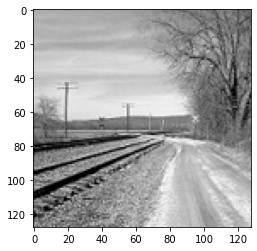

In [13]:
#Display original gray_scale image
from matplotlib import pyplot as plt
plt.imshow(x[0],cmap='gray')

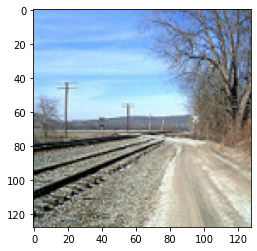

In [14]:
#Display expected image to be generated
plt.imshow(y[0],cmap='gray')

In [15]:
#Generate image
img=x[0]
img=img.reshape(1,128,128,1)
yhat=autoencoder.predict(img)
yhat.shape

(1, 128, 128, 3)

In [16]:
yhat=np.clip(yhat,0,255)

In [17]:
yhat.max(),yhat.min()

(255.0, 6.842487)

In [18]:
yhat=yhat.astype(np.uint8)

In [19]:
yhat.shape

(1, 128, 128, 3)

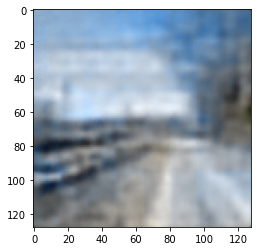

In [20]:
#Display generated image
plt.imshow(yhat[0])